dataset  Consumo sustancias   Argentina 2022  tiene  562 columnas y 12000 filas

![Consumo de Suatancias 2022]

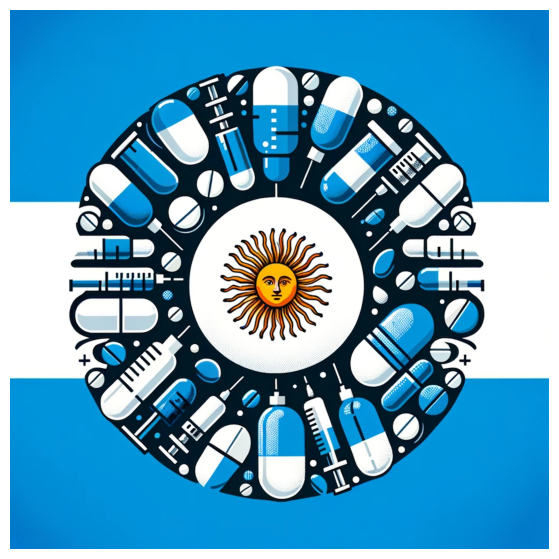

In [30]:
from PIL import Image
import matplotlib.pyplot as plt

# Cargar la imagen desde un archivo
imagen = Image.open('E:\Data\Data_Sience\Data_Science\Proyecto_Consumo_sustancias_Argentina_2022\logo_proyecto.png')

# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off')  # No mostrar ejes
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats






In [2]:

url = 'https://drive.google.com/uc?id=1MwJRQi1BC82ZMu50HL1Q9_rDRZxP6N3D'
#url='https:\\drive.google.com\file\d\1MwJRQi1BC82ZMu50HL1Q9_rDRZxP6N3D\view?usp=drive_link'
# usar la ruta correcta del archivo
#https://drive.google.com/file/d/1MwJRQi1BC82ZMu50HL1Q9_rDRZxP6N3D/view?usp=drive_link
df = pd.read_csv(url,sep=';', on_bad_lines='skip')
# Rellenar valores nulos 
df = df.fillna(0)  # Rellenar con 0
# Ver las primeras filas del DataFrame
print(df.head())

# Obtener el número de filas y columnas
num_filas, num_columnas = df.shape

print(f"El DataFrame tiene {num_filas} filas y {num_columnas} columnas.")

C:\Users\danie\AppData\Local\Temp\ipykernel_21440\2808215830.py:5: DtypeWarning: Columns (175,176,206,207,276,381,382,383,396,397,424) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url,sep=';', on_bad_lines='skip')


   ID_PER   WPER  CANT_MIEMBROS_HOGAR  CANT_PERSONAS0A17  CLIMA_EDUCATIVO  \
0  336578    124                    1                  0                2   
1  305909    781                    1                  0                3   
2  358892  34193                    4                  1                2   
3  342664    968                    1                  0                3   
4  394688  11509                    2                  0                3   

   J_SEXO  J_EDAD  J_NIVEL_EDUCATIVO  SEXO_SEL  EDAD_SEL  ...  ID_06B  ID_06C  \
0       1      27                  4         1        27  ...       4       2   
1       1      33                  6         1        33  ...       2       2   
2       1      43                  4         2        19  ...       1       2   
3       2      51                  6         2        51  ...       1       4   
4       2      59                  5         1        31  ...       2       1   

   ID_06D  ID_06E  ID_06F  ID_06G  ID_06H  ID_06I 

#############            Utilizacion de lib Matplotlib     ##########################


grafico barras :  Cual es la cantidad y promedio de edad  por sexo de los encuestados ?

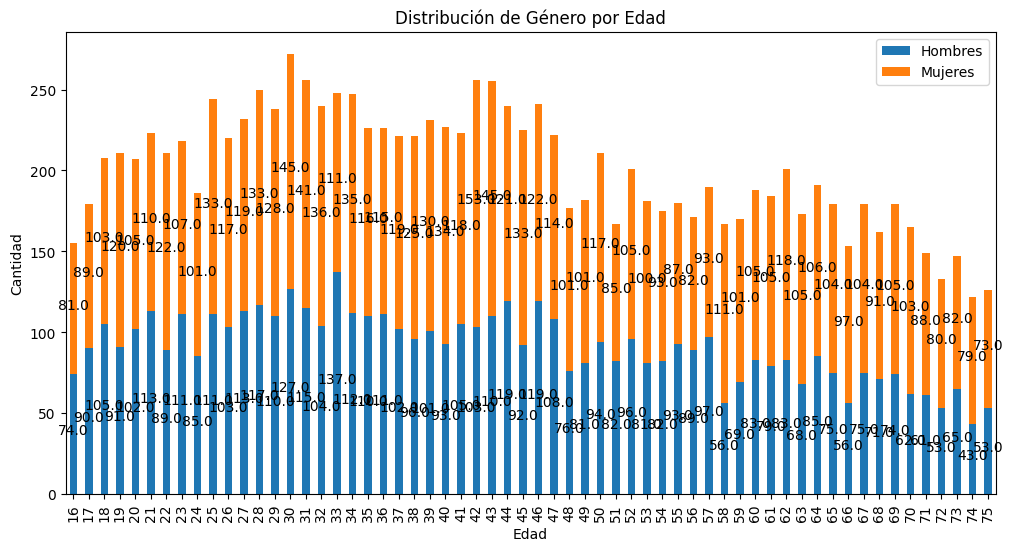

In [3]:


# Filtrar por sexo válido (1 o 2)
df_filtrado = df[df['SEXO_SEL'].isin([1, 2])]

# Agrupar por edad y sexo, y contar
conteo_por_edad_y_sexo = df_filtrado.groupby(['EDAD_SEL', 'SEXO_SEL']).size().unstack()

# Crear un gráfico de barras apiladas
ax = conteo_por_edad_y_sexo.plot(kind='bar', stacked=True, figsize=(12, 6))

# Agregar títulos y etiquetas
plt.title('Distribución de Género por Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.legend(['Hombres', 'Mujeres'])

# Añadir etiquetas en cada barra
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center')
# Mostrar el gráfico
plt.show()

///////   grafico por dispersion de burbujas  ///////////


Que nivel de educacion  tienen  los encuestados  segun sus edades  ?

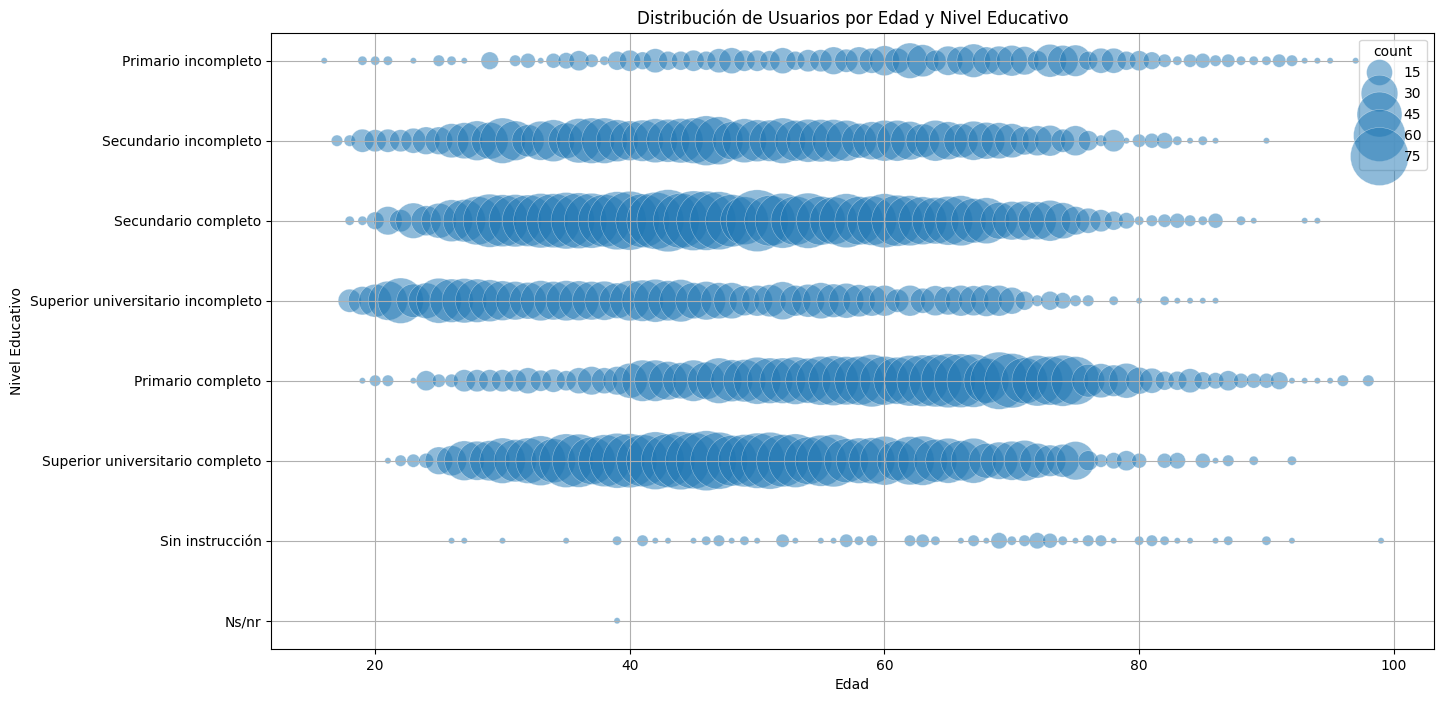

In [4]:

# Agrupando los datos por edad y nivel educativo, y contando el número de usuarios en cada grupo
grouped_data = df.groupby(['J_EDAD', 'J_NIVEL_EDUCATIVO']).size().reset_index(name='count')

# Mapeo de los códigos de nivel educativo a sus nombres
niveles_educativos = {
    1: 'Primario incompleto',
    2: 'Primario completo',
    3: 'Secundario incompleto',
    4: 'Secundario completo',
    5: 'Superior universitario incompleto',
    6: 'Superior universitario completo',
    7: 'Sin instrucción',
    9: 'Ns/nr'
}

# Asignando los nombres a los niveles educativos en los datos
grouped_data['Nivel_Educativo_Nombre'] = grouped_data['J_NIVEL_EDUCATIVO'].map(niveles_educativos)

# Creando el diagrama de dispersión con burbujas
plt.figure(figsize=(15, 8))
sns.scatterplot(data=grouped_data, x='J_EDAD', y='Nivel_Educativo_Nombre', size='count', sizes=(20, 2000), alpha=0.5)

plt.title('Distribución de Usuarios por Edad y Nivel Educativo')
plt.xlabel('Edad')
plt.ylabel('Nivel Educativo')
plt.grid(True)
plt.show()

/////////////  grafico violin plot  ///////

que tipo de cobertura de salud tienen  los encuestados ??

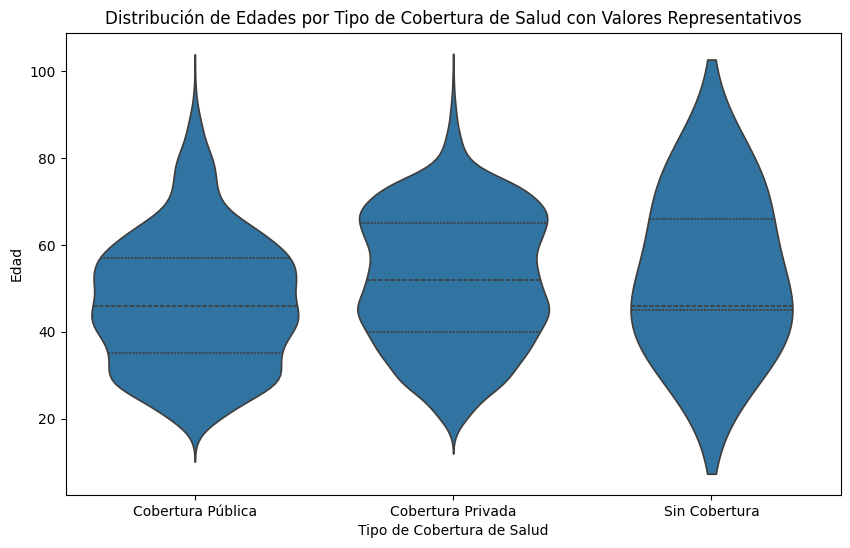

In [5]:
# Mapeo de los códigos de cobertura de salud a sus nombres
coberturas_salud = {
    1: 'Cobertura Privada',
    2: 'Cobertura Pública',
    9: 'Sin Cobertura'
}

# Asignando los nombres a las coberturas de salud en los datos
df['Cobertura_Salud'] = df['COBERTURA_SEL'].map(coberturas_salud)

# Creando el violin plot con valores representativos de cuartiles
plt.figure(figsize=(10, 6))
sns.violinplot(x='Cobertura_Salud', y='J_EDAD', data=df, inner="quartile")

plt.title('Distribución de Edades por Tipo de Cobertura de Salud con Valores Representativos')
plt.xlabel('Tipo de Cobertura de Salud')
plt.ylabel('Edad')
plt.show()

#####################  Graficos con libreria seaborn #############################

como es la cobertura de salud de los encuestados ??

grafioc  lineal  

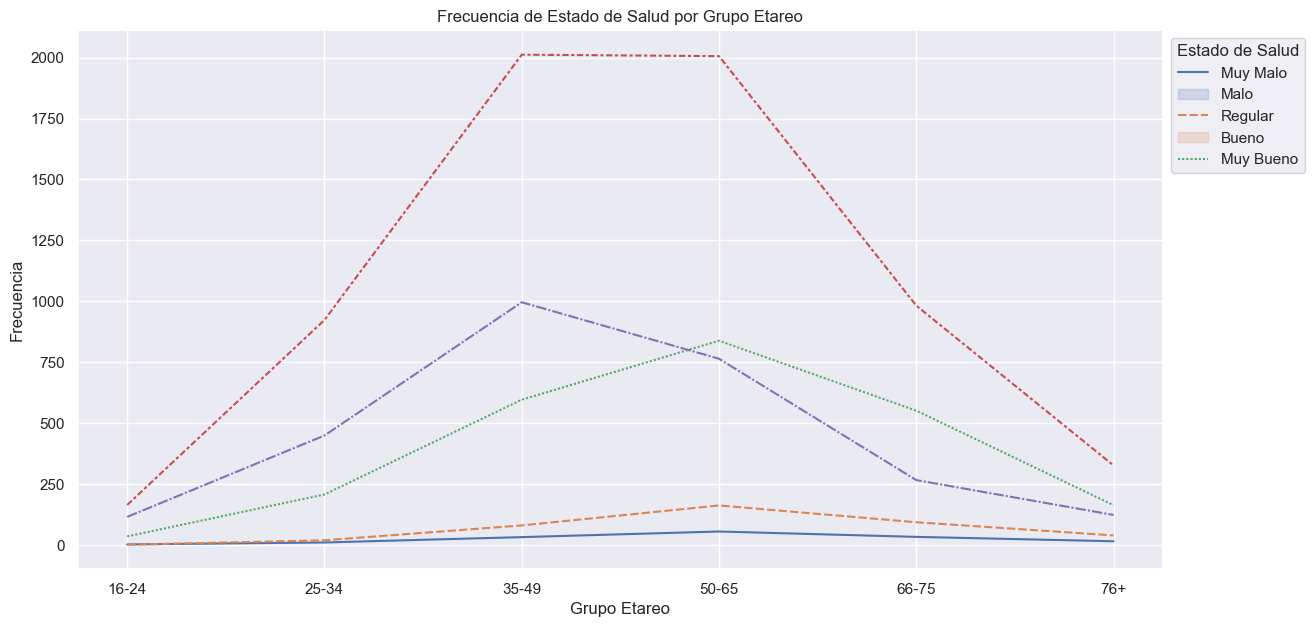

In [6]:
# Definimos los límites de los grupos etareos
bins = [15, 24, 34, 49, 65, 75, 100]
labels = ['16-24', '25-34', '35-49', '50-65', '66-75', '76+']
df['Grupo_Etareo'] = pd.cut(df['J_EDAD'], bins=bins, labels=labels, right=False)

# Filtramos los datos para excluir '99' que representa 'no sabe/no responde'
data_filtrada = df[df['SA_03'] != 99]

# Creamos un dataframe que contiene la frecuencia de cada estado de salud por grupo etareo
frecuencia_estado_salud = data_filtrada.groupby(['Grupo_Etareo', 'SA_03']).size().unstack(fill_value=0)

# Utilizamos Seaborn para crear el gráfico de líneas múltiples
sns.set_theme(style="whitegrid")  # Establecemos el tema de Seaborn con un fondo de cuadrícula
sns.set(rc={'figure.figsize':(14,7)})  # Ajustamos el tamaño de la figura
lineplot = sns.lineplot(data=frecuencia_estado_salud)
lineplot.set_title('Frecuencia de Estado de Salud por Grupo Etareo')
lineplot.set_xlabel('Grupo Etareo')
lineplot.set_ylabel('Frecuencia')
lineplot.legend(title='Estado de Salud', labels=['Muy Malo', 'Malo', 'Regular', 'Bueno', 'Muy Bueno'])

# Mostramos el gráfico
sns.move_legend(lineplot, "upper left", bbox_to_anchor=(1, 1))  # Movemos la leyenda fuera del gráfico
plt.show()

/////   grafico de barras 

utiliza medicamentos  para malestares   leves ? 

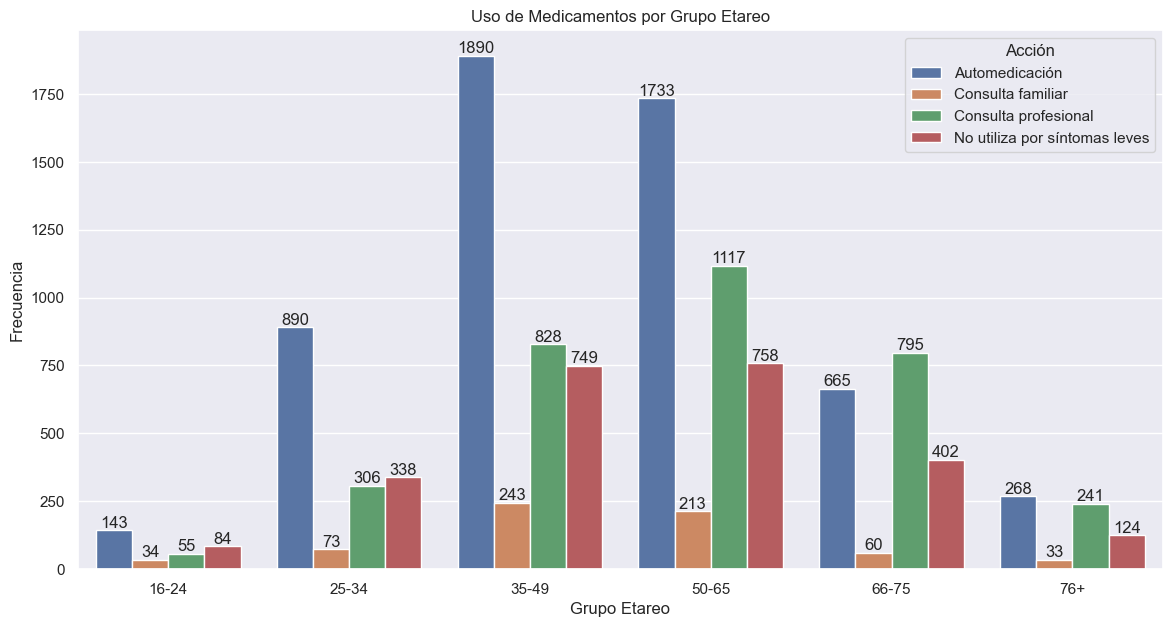

In [7]:

# Definimos los límites de los grupos etareos
bins = [15, 24, 34, 49, 65, 75, 100]
labels = ['16-24', '25-34', '35-49', '50-65', '66-75', '76+']
df['Grupo_Etareo'] = pd.cut(df['J_EDAD'], bins=bins, labels=labels, right=False)

# Evitamos el SettingWithCopyWarning creando una copia del DataFrame filtrado
data_filtrada = df[df['SA_08'] != 99].copy()

# Mapeamos los valores de la columna 'SA_08' a sus descripciones correspondientes
mapeo_acciones = {
    1: 'Consulta profesional',
    2: 'Consulta familiar',
    3: 'Automedicación',
    4: 'No utiliza por síntomas leves'
}
data_filtrada['SA_08'] = data_filtrada['SA_08'].map(mapeo_acciones)

# Creamos un DataFrame que contiene el conteo de las respuestas de 'SA_08' por grupo etareo
conteo_medicamentos = data_filtrada.groupby(['Grupo_Etareo', 'SA_08'], observed=True).size().reset_index(name='Frecuencia')

# Configuramos el tamaño del gráfico y el tema
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(14,7)})

# Creamos el gráfico de barras
barplot = sns.barplot(x='Grupo_Etareo', y='Frecuencia', hue='SA_08', data=conteo_medicamentos)

# Añadimos los valores a las barras
for container in barplot.containers:
    barplot.bar_label(container)

# Establecemos los títulos y etiquetas del gráfico
barplot.set_title('Uso de Medicamentos por Grupo Etareo')
barplot.set_xlabel('Grupo Etareo')
barplot.set_ylabel('Frecuencia')
barplot.legend(title='Acción')

////  grafico point plot 

como es el cosnumo de alcohol y tabaco en los distintos grupos etareos ?

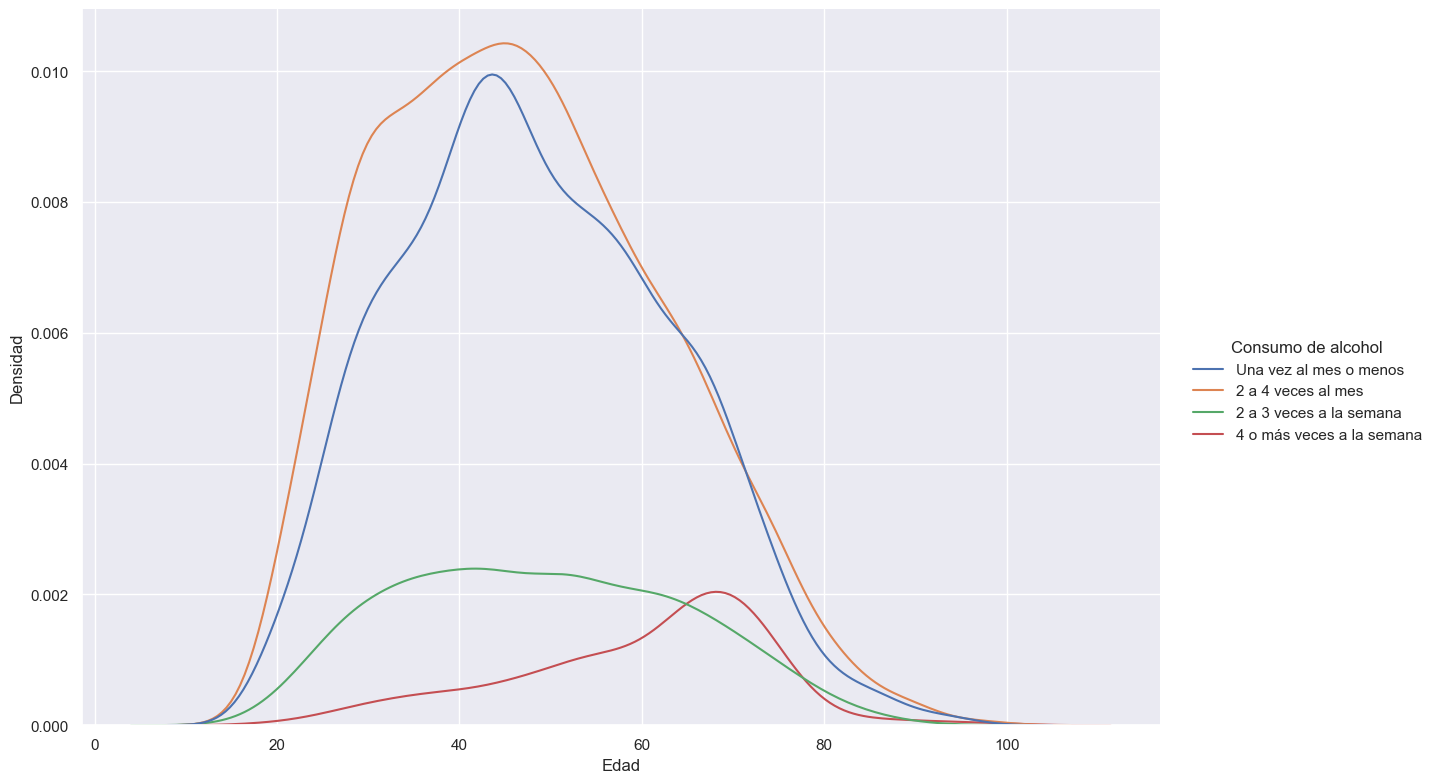

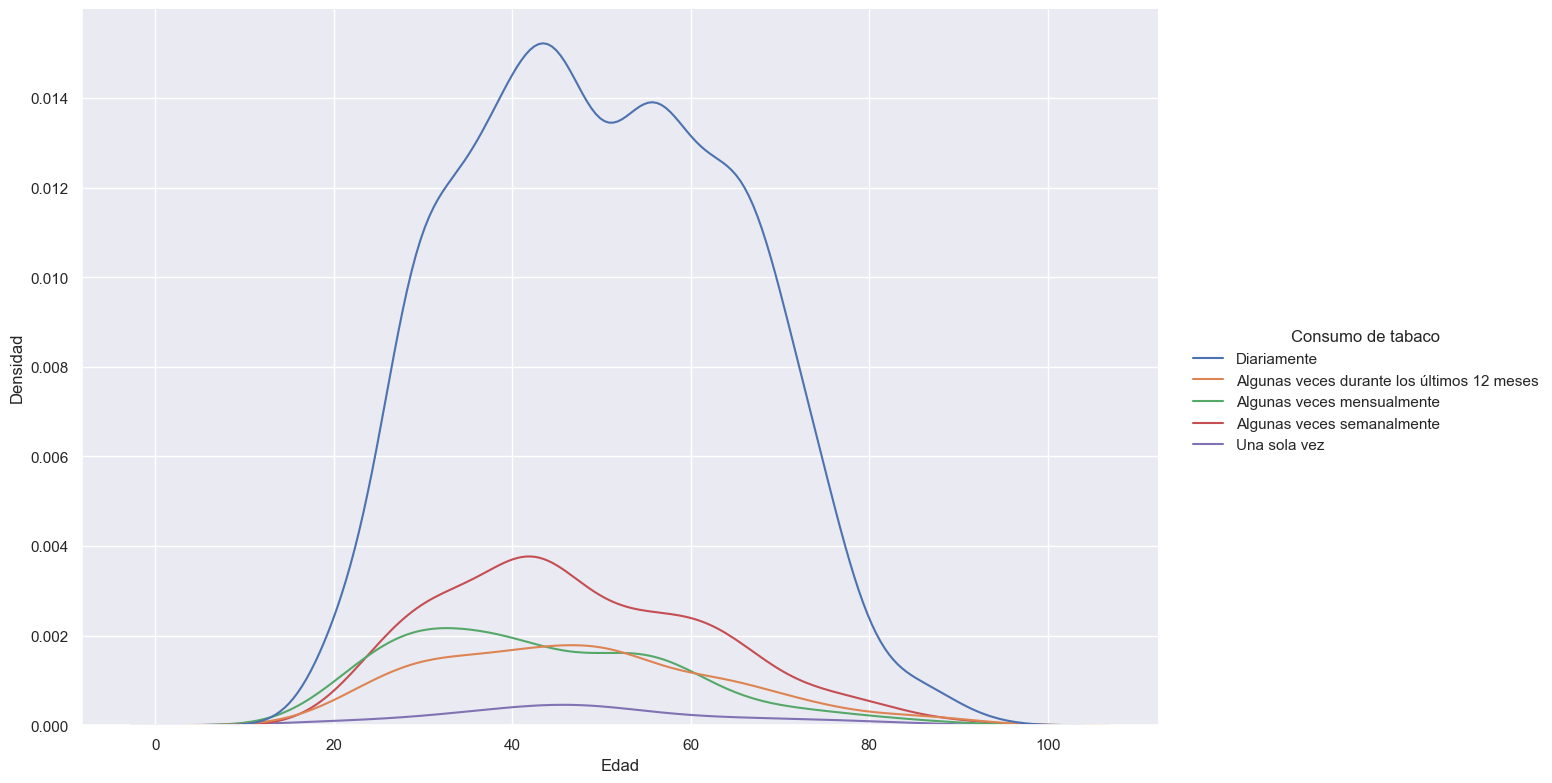

In [8]:
# Definimos los límites de los grupos etareos y sus etiquetas
bins = [15, 24, 34, 49, 65, 75, 100]
labels = ['16-24', '25-34', '35-49', '50-65', '66-75', '76+']
df['Grupo_Etareo'] = pd.cut(df['J_EDAD'], bins=bins, labels=labels, right=False)

# Mapeamos los valores de las columnas 'AL_05' y 'TA_06' a descripciones
# Esto es para asegurar que los distintos casos de consumo sean claros en el gráfico
consumo_alcohol_descripciones = {
    1: 'Una vez al mes o menos',
    2: '2 a 4 veces al mes',
    3: '2 a 3 veces a la semana',
    4: '4 o más veces a la semana'
}

consumo_tabaco_descripciones = {
    1: 'Una sola vez',
    2: 'Algunas veces durante los últimos 12 meses',
    3: 'Algunas veces mensualmente',
    4: 'Algunas veces semanalmente',
    5: 'Diariamente'
}

# Filtramos los datos para excluir '99' que representa 'no contesta' en ambas columnas
data_filtrada = df[(df['AL_05'] != 99) & (df['TA_06'] != 99)].copy()
data_filtrada['AL_05'] = data_filtrada['AL_05'].map(consumo_alcohol_descripciones)
data_filtrada['TA_06'] = data_filtrada['TA_06'].map(consumo_tabaco_descripciones)

# Graficamos la densidad del consumo de alcohol por edad
grafico_alcohol = sns.displot(data_filtrada, x='J_EDAD', hue='AL_05', kind='kde', height=8, aspect=1.5)
grafico_alcohol.set_axis_labels('Edad', 'Densidad')
grafico_alcohol._legend.set_title('Consumo de alcohol')

# Graficamos la densidad del consumo de tabaco por edad
grafico_tabaco = sns.displot(data_filtrada, x='J_EDAD', hue='TA_06', kind='kde', height=8, aspect=1.5)
grafico_tabaco.set_axis_labels('Edad', 'Densidad')
grafico_tabaco._legend.set_title('Consumo de tabaco')

--abstract-

        Este data set tiene como origen el organismo del "Indec"  Argentina , donde acumula los datos de una encuesta
        sobre el consumo de sustancias/drogas  que pueden afectar la salud de los seres humanos: alcohol, medicamentos , marihuana, cocahina ,etc,etc..., dicha encuesta es realizada en el año 2022.
        En este analisis ,trataremos  de mostrar las posibles causas ,herramientas de tratamiento y posibles soluciones a estos cosnumos .  

In [9]:
texto="""Este data set tiene como origen el organismo del "Indec"  Argentina , donde acumula los datos de una encuesta
        sobre el consumo de sustancias/drogas  que pueden afectar la salud de los seres humanos: alcohol, medicamentos , marihuana, cocahina ,etc,etc..., dicha encuesta es realizada en el año 2022.
        En este analisis ,trataremos  de mostrar las posibles causas ,herramientas de tratamiento y posibles soluciones a estos cosnumos .  """
cantidad_de_caracteres = len(texto)
print("Cantidad de caracteres:", cantidad_de_caracteres)

Cantidad de caracteres: 448


Algunas  de  las variables que utilizaremos para esta  parte  :
    'AL_01': 'Bebidas alcohólicas',
    'SA_08': 'Medicamentos para síntomas leves',
    'TA_01': 'Tabaco',
    'TR_01': 'Tranquilizantes recetados',
    'ES_01': 'Estimulantes recetados',
    'MO_01': 'Medicamentos opioides sin receta',
    'MA_04': 'Marihuana en los últimos 12 meses',
    'CO_01': 'Cocaína',
    'EDAD_SEL':'EDAD DEL ENCUESTADO',
    'SEXO_SEL': 'sexo'

In [10]:
# Lista de columnas de interés
columnas = [
    'AL_01',  # Bebidas alcohólicas
    'SA_08',  # Medicamentos para síntomas leves
    'TA_01',  # Tabaco
    'TR_01',  # Tranquilizantes recetados
    'ES_01',  # Estimulantes recetados
    'MO_01',  # Medicamentos opioides sin receta
    'MA_04',  # Marihuana en los últimos 12 meses
    'CO_01',  # Cocaína
    'EDAD_SEL', # EDAD DEL ENCUESTADO
    'SEXO_SEL'  # Sexo
]

# Seleccionar las columnas en el DataFrame
df_seleccionado = df[columnas]

# Mostrar las primeras filas del DataFrame seleccionado
print(df_seleccionado.head())


   AL_01  SA_08  TA_01  TR_01  ES_01  MO_01  MA_04  CO_01  EDAD_SEL  SEXO_SEL
0      1      3      1      2      2      4    1.0      2        27         1
1      1      3      1      2      2      4    1.0      2        33         1
2      1      3      1      2      2     98    0.0      2        19         2
3      1      4      1      2      2      4    0.0      2        51         2
4      1      1      1      2      2      4    1.0      2        31         1


In [11]:
df_seleccionado.describe()

,AL_01,SA_08,TA_01,TR_01,ES_01,MO_01,MA_04,CO_01,EDAD_SEL,SEXO_SEL
count,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000
mean,1.204029,2.754187,1.515918,2.020146,2.123528,4.737274,0.270270,2.037473,43.478030,1.547339
std,1.820729,4.072860,1.351328,4.065810,3.952772,8.417326,1.090352,2.656042,16.498695,0.497775
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,16.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,0.000000,2.000000,30.000000,1.000000
50%,1.000000,3.000000,1.000000,2.000000,2.000000,4.000000,0.000000,2.000000,42.000000,2.000000
75%,1.000000,3.000000,2.000000,2.000000,2.000000,4.000000,0.000000,2.000000,57.000000,2.000000
max,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,75.000000,2.000000


In [12]:
# Diccionario de nombres de columnas: clave es el nombre actual, valor es el nuevo nombre
nuevos_nombres = {
    'AL_01': 'Bebidas_alcohólicas',
    'SA_08': 'Medicamentos_síntomas_leves',
    'TA_01': 'Tabaco',
    'TR_01': 'Tranquilizantes_recetados',
    'ES_01': 'Estimulantes_recetados',
    'MO_01': 'Medicamentos_opioides_sin_receta',
    'MA_04': 'Marihuana_últimos_12_meses',
    'CO_01': 'Cocaína',
    'EDAD_SEL': 'Edad_encuestado',
    'SEXO_SEL': 'Sexo'
}

# Cambiar los nombres de las columnas
df_seleccionado.rename(columns=nuevos_nombres, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar los cambios
print(df_seleccionado.head())

   Bebidas_alcohólicas  Medicamentos_síntomas_leves  Tabaco  \
0                    1                            3       1   
1                    1                            3       1   
2                    1                            3       1   
3                    1                            4       1   
4                    1                            1       1   

   Tranquilizantes_recetados  Estimulantes_recetados  \
0                          2                       2   
1                          2                       2   
2                          2                       2   
3                          2                       2   
4                          2                       2   

   Medicamentos_opioides_sin_receta  Marihuana_últimos_12_meses  Cocaína  \
0                                 4                         1.0        2   
1                                 4                         1.0        2   
2                                98                     

C:\Users\danie\AppData\Local\Temp\ipykernel_21440\3746103613.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado.rename(columns=nuevos_nombres, inplace=True)


In [13]:
#tipo de datos
df_seleccionado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12062 entries, 0 to 12061
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bebidas_alcohólicas               12062 non-null  int64  
 1   Medicamentos_síntomas_leves       12062 non-null  int64  
 2   Tabaco                            12062 non-null  int64  
 3   Tranquilizantes_recetados         12062 non-null  int64  
 4   Estimulantes_recetados            12062 non-null  int64  
 5   Medicamentos_opioides_sin_receta  12062 non-null  int64  
 6   Marihuana_últimos_12_meses        12062 non-null  float64
 7   Cocaína                           12062 non-null  int64  
 8   Edad_encuestado                   12062 non-null  int64  
 9   Sexo                              12062 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 942.5 KB


In [14]:
#categorizo valiables 
# Cambiar el tipo de dato de 'Edad_encuestado' y 'Sexo' a categoría
df_seleccionado['Edad_encuestado'] = df_seleccionado['Edad_encuestado'].astype('category')
df_seleccionado['Sexo'] = df_seleccionado['Sexo'].astype('category')

# Verificar los cambios en los tipos de datos
print(df_seleccionado.dtypes)


Bebidas_alcohólicas                    int64
Medicamentos_síntomas_leves            int64
Tabaco                                 int64
Tranquilizantes_recetados              int64
Estimulantes_recetados                 int64
Medicamentos_opioides_sin_receta       int64
Marihuana_últimos_12_meses           float64
Cocaína                                int64
Edad_encuestado                     category
Sexo                                category
dtype: object


C:\Users\danie\AppData\Local\Temp\ipykernel_21440\899865933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado['Edad_encuestado'] = df_seleccionado['Edad_encuestado'].astype('category')
C:\Users\danie\AppData\Local\Temp\ipykernel_21440\899865933.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado['Sexo'] = df_seleccionado['Sexo'].astype('category')


Preguntas e Hipotesys :



Preguntas de interés:

¿Cuál es la sustancia más consumida según la encuesta y cómo varía por edad y género?
¿Existe una correlación entre el nivel socioeconómico y la prevalencia del consumo de ciertas drogas?
¿Cómo ha evolucionado el consumo de estas sustancias en comparación con años anteriores?
¿Qué factores demográficos (como la ubicación, la edad o el género) están asociados con un mayor riesgo de consumo de sustancias?
¿Cuáles son las tendencias en el consumo de nuevas sustancias psicoactivas que han emergido recientemente?



¿Cuál es la sustancia más consumida según la encuesta y cómo varía por edad y género?

In [15]:


# Diccionario que mapea las columnas a las sustancias correspondientes
consumo_sustancias = {
    'AL_01': 'Bebidas alcohólicas',
    'SA_08': 'Medicamentos para síntomas leves',
    'TA_01': 'Tabaco',
    'TR_01': 'Tranquilizantes recetados',
    'ES_01': 'Estimulantes recetados',
    'MO_01': 'Medicamentos opioides sin receta',
    'MA_04': 'Marihuana en los últimos 12 meses',
    'CO_01': 'Cocaína'
}

# Contar las respuestas afirmativas (valor 1) para cada sustancia
frecuencias_consumo = {}
for columna, sustancia in consumo_sustancias.items():
    # Contamos cuántas veces se responde "Sí" (que corresponde al valor 1)
    frecuencia = df[columna].value_counts().get(1, 0)
    frecuencias_consumo[sustancia] = frecuencia

# Encontrar la sustancia con la frecuencia más alta de consumo afirmativo
sustancia_mas_consumida = max(frecuencias_consumo, key=frecuencias_consumo.get)
frecuencia_mas_alta = frecuencias_consumo[sustancia_mas_consumida]

# Imprimir los resultados
print("La sustancia más consumida es:", sustancia_mas_consumida)
print("Frecuencia de consumo afirmativo:", frecuencia_mas_alta)
print("Frecuencias de consumo para todas las sustancias:", frecuencias_consumo)


La sustancia más consumida es: Bebidas alcohólicas
Frecuencia de consumo afirmativo: 9989
Frecuencias de consumo para todas las sustancias: {'Bebidas alcohólicas': 9989, 'Medicamentos para síntomas leves': 3342, 'Tabaco': 6033, 'Tranquilizantes recetados': 1794, 'Estimulantes recetados': 450, 'Medicamentos opioides sin receta': 20, 'Marihuana en los últimos 12 meses': 903, 'Cocaína': 421}


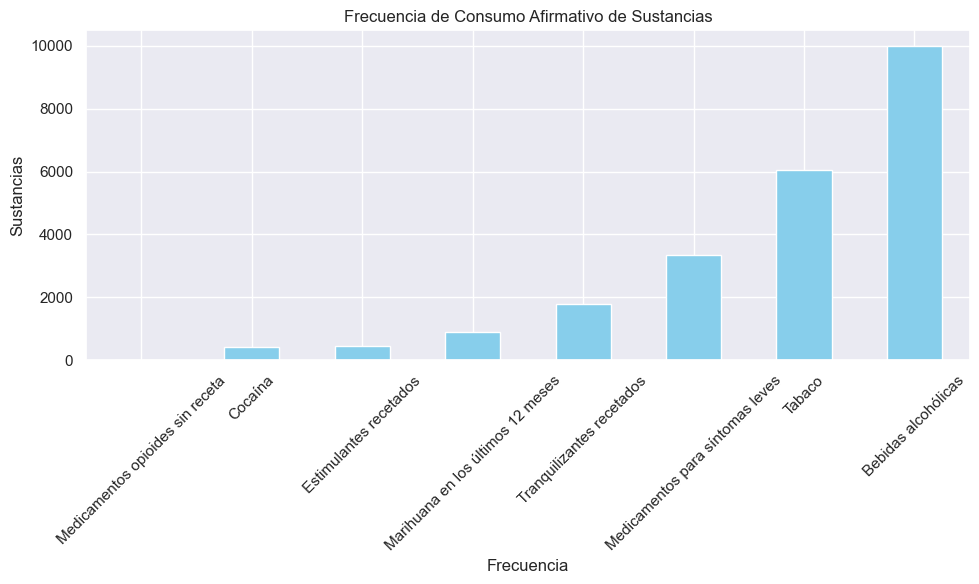

In [16]:

# Convertir a Series de Pandas para facilitar la visualización
frecuencias_series = pd.Series(frecuencias_consumo)

# Crear y mostrar el gráfico de barras
plt.figure(figsize=(10, 6))
frecuencias_series.sort_values().plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Consumo Afirmativo de Sustancias')
plt.xlabel('Frecuencia')
plt.ylabel('Sustancias')
plt.xticks(rotation=45)  # Rota las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

Como es el consumo de sustancias ,por edad y por sexo ??

In [17]:
df_seleccionado.head()

,Bebidas_alcohólicas,Medicamentos_síntomas_leves,Tabaco,Tranquilizantes_recetados,Estimulantes_recetados,Medicamentos_opioides_sin_receta,Marihuana_últimos_12_meses,Cocaína,Edad_encuestado,Sexo
0,1,3,1,2,2,4,1.0,2,27,1
1,1,3,1,2,2,4,1.0,2,33,1
2,1,3,1,2,2,98,0.0,2,19,2
3,1,4,1,2,2,4,0.0,2,51,2
4,1,1,1,2,2,4,1.0,2,31,1


In [18]:
#tipo de datos  por categoria

print(df_seleccionado.dtypes)


Bebidas_alcohólicas                    int64
Medicamentos_síntomas_leves            int64
Tabaco                                 int64
Tranquilizantes_recetados              int64
Estimulantes_recetados                 int64
Medicamentos_opioides_sin_receta       int64
Marihuana_últimos_12_meses           float64
Cocaína                                int64
Edad_encuestado                     category
Sexo                                category
dtype: object


In [19]:
# Asegurarse de que 'Edad_encuestado' y 'Sexo' son de tipo categórico
df_seleccionado['Edad_encuestado'] = df_seleccionado['Edad_encuestado'].astype('category')
df_seleccionado['Sexo'] = df_seleccionado['Sexo'].astype('category')

# Seleccionar solo las columnas numéricas para calcular la media
columnas_numericas = df_seleccionado.select_dtypes(include=['number']).columns

# Calcular el consumo promedio por grupo de edad, seleccionando solo las columnas numéricas
consumo_medio_por_edad = df_seleccionado.groupby('Edad_encuestado')[columnas_numericas].mean()

# Calcular el consumo promedio por sexo, seleccionando solo las columnas numéricas
consumo_medio_por_sexo = df_seleccionado.groupby('Sexo')[columnas_numericas].mean()




C:\Users\danie\AppData\Local\Temp\ipykernel_21440\2081203916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado['Edad_encuestado'] = df_seleccionado['Edad_encuestado'].astype('category')
C:\Users\danie\AppData\Local\Temp\ipykernel_21440\2081203916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado['Sexo'] = df_seleccionado['Sexo'].astype('category')


In [20]:
print(consumo_medio_por_edad)

                 Bebidas_alcohólicas  Medicamentos_síntomas_leves    Tabaco  \
Edad_encuestado                                                               
16                          1.458065                     2.251613  1.877419   
17                          1.251397                     2.972067  1.748603   
18                          1.211538                     3.028846  1.725962   
19                          1.189573                     2.729858  1.691943   
20                          1.149758                     3.173913  1.685990   
21                          1.143498                     2.717489  1.600897   
22                          1.099526                     2.701422  1.601896   
23                          1.077982                     2.715596  1.536697   
24                          1.139785                     2.709677  1.564516   
25                          1.118852                     2.651639  1.536885   
26                          1.059091                

In [21]:
print(consumo_medio_por_sexo)

      Bebidas_alcohólicas  Medicamentos_síntomas_leves    Tabaco  \
Sexo                                                               
1                1.104212                     2.843040  1.444139   
2                1.286580                     2.680703  1.575280   

      Tranquilizantes_recetados  Estimulantes_recetados  \
Sexo                                                      
1                      2.019963                2.103297   
2                      2.020297                2.140261   

      Medicamentos_opioides_sin_receta  Marihuana_últimos_12_meses   Cocaína  
Sexo                                                                          
1                             4.754212                    0.363736  2.010256  
2                             4.723266                    0.192972  2.059982  


relaciones variables y distribucion


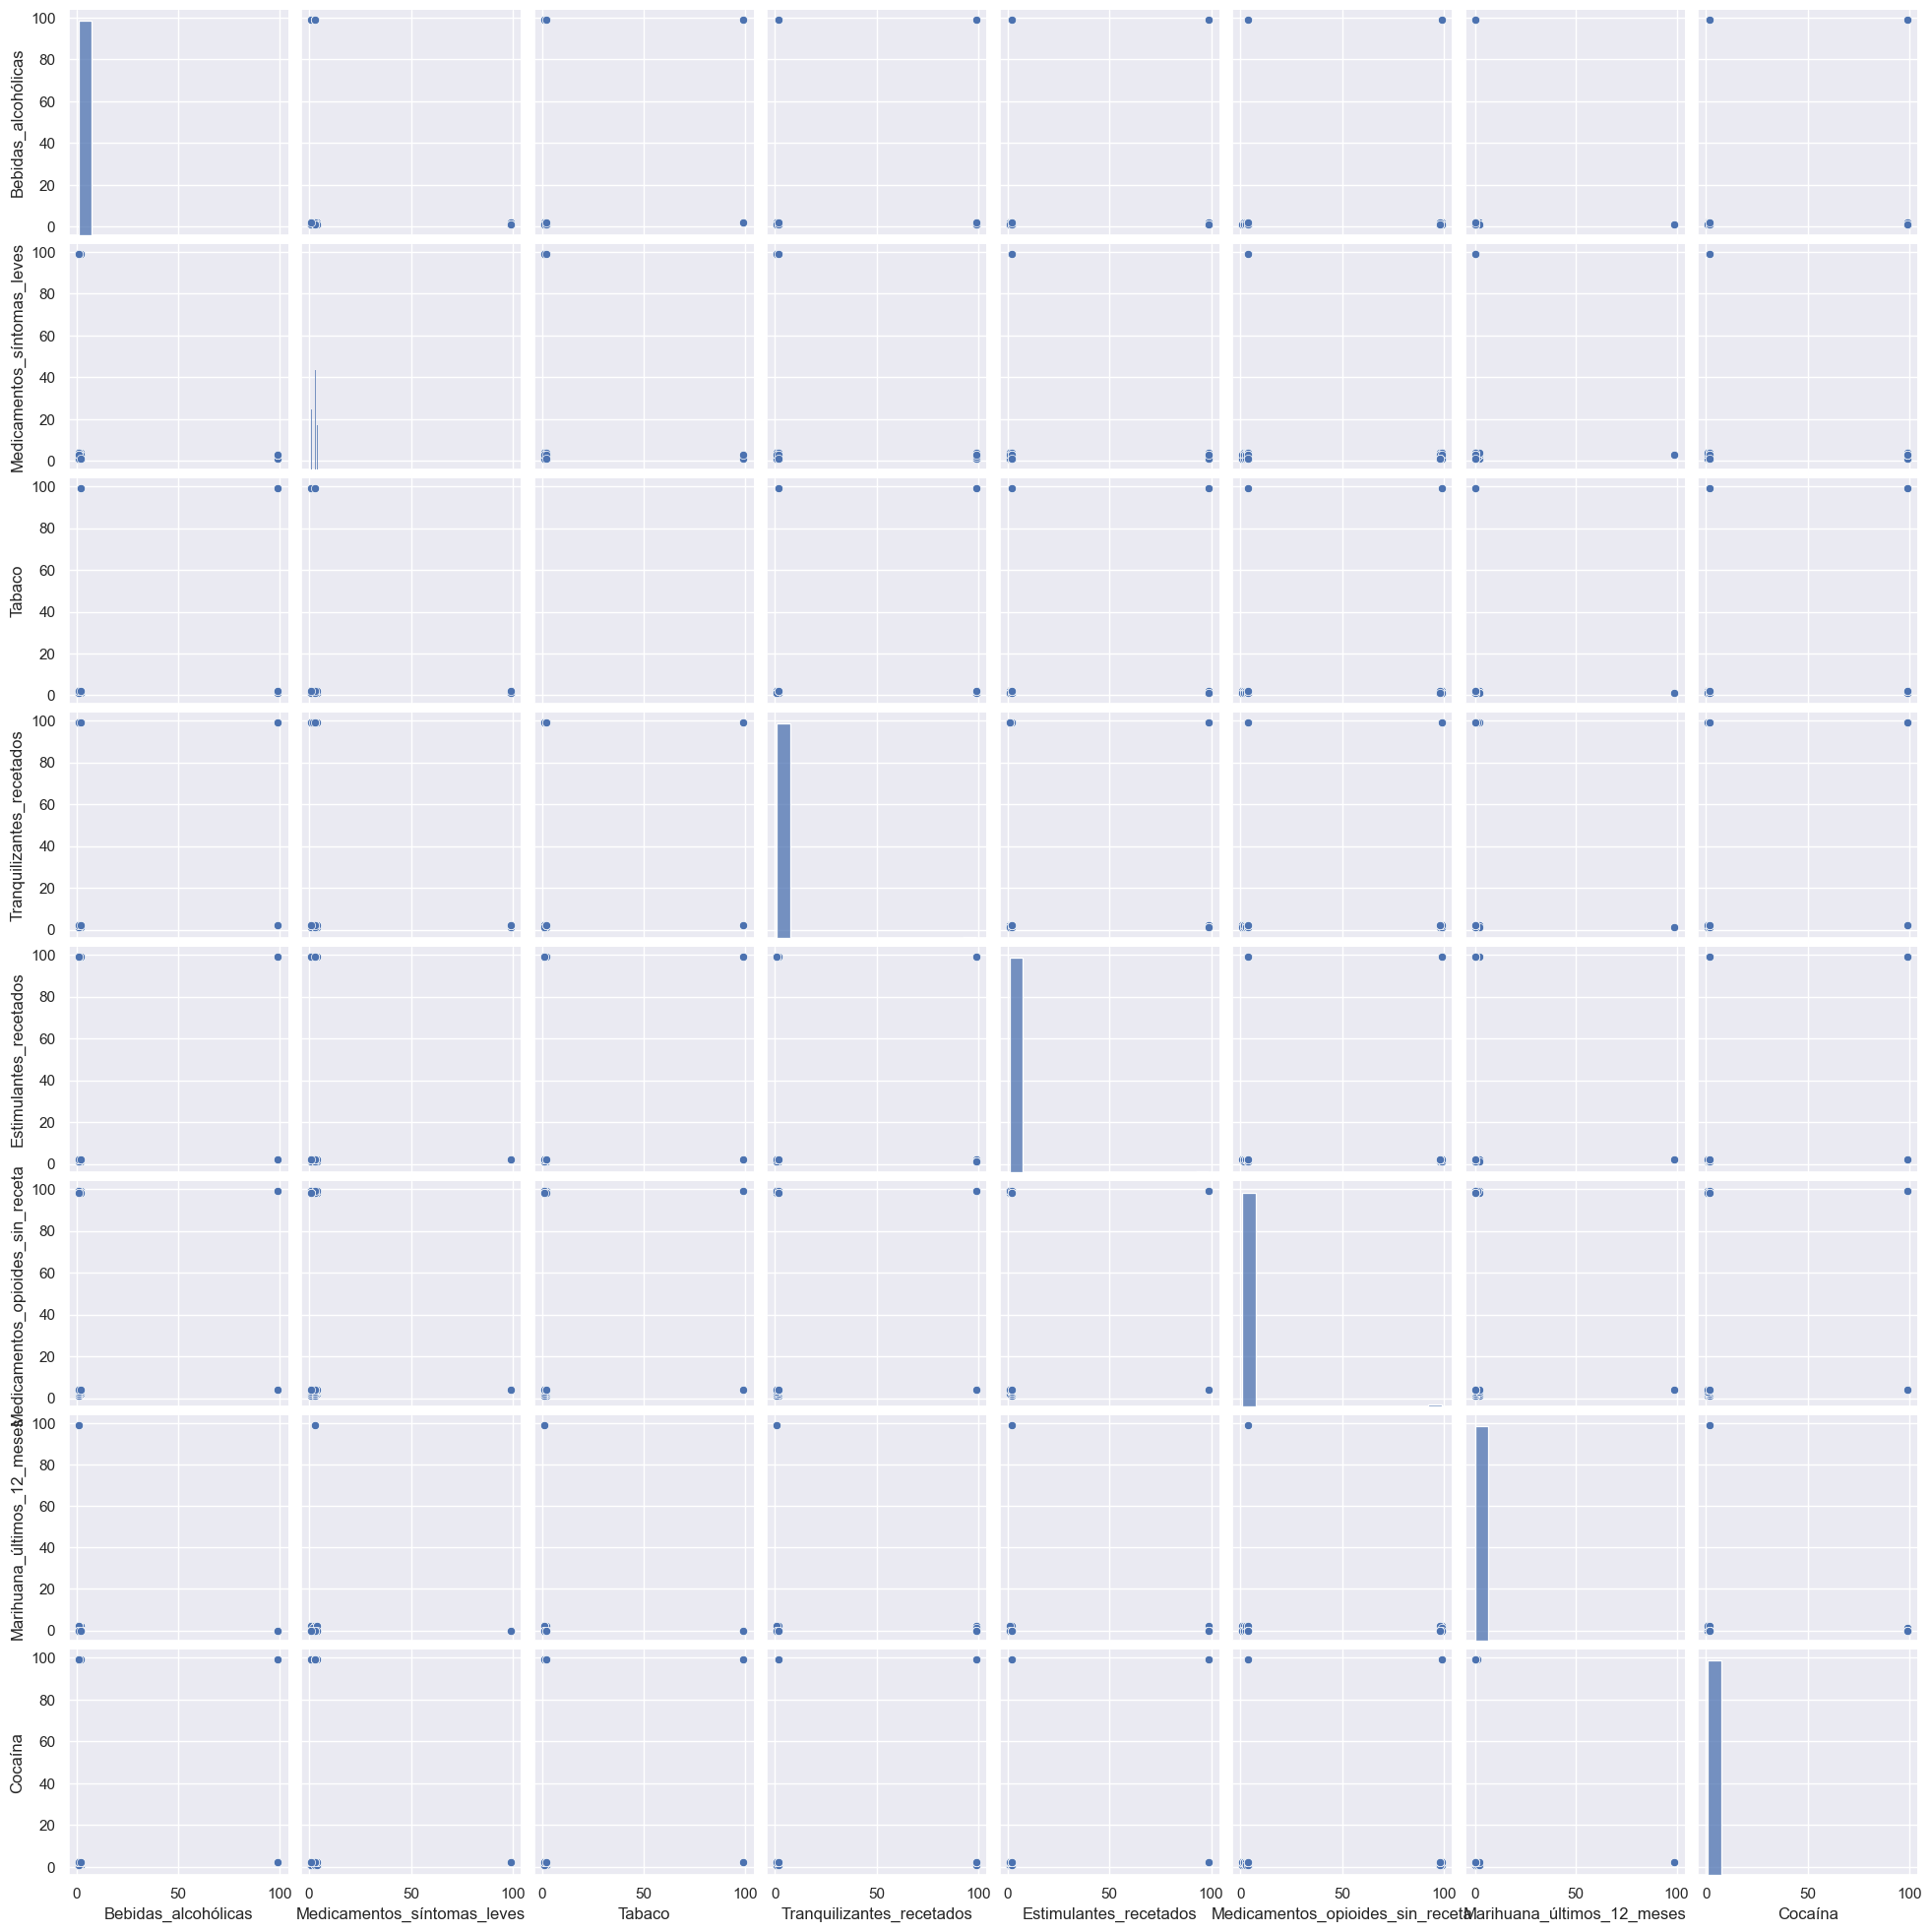

In [22]:
sns.pairplot(data=df_seleccionado)
plt.show()

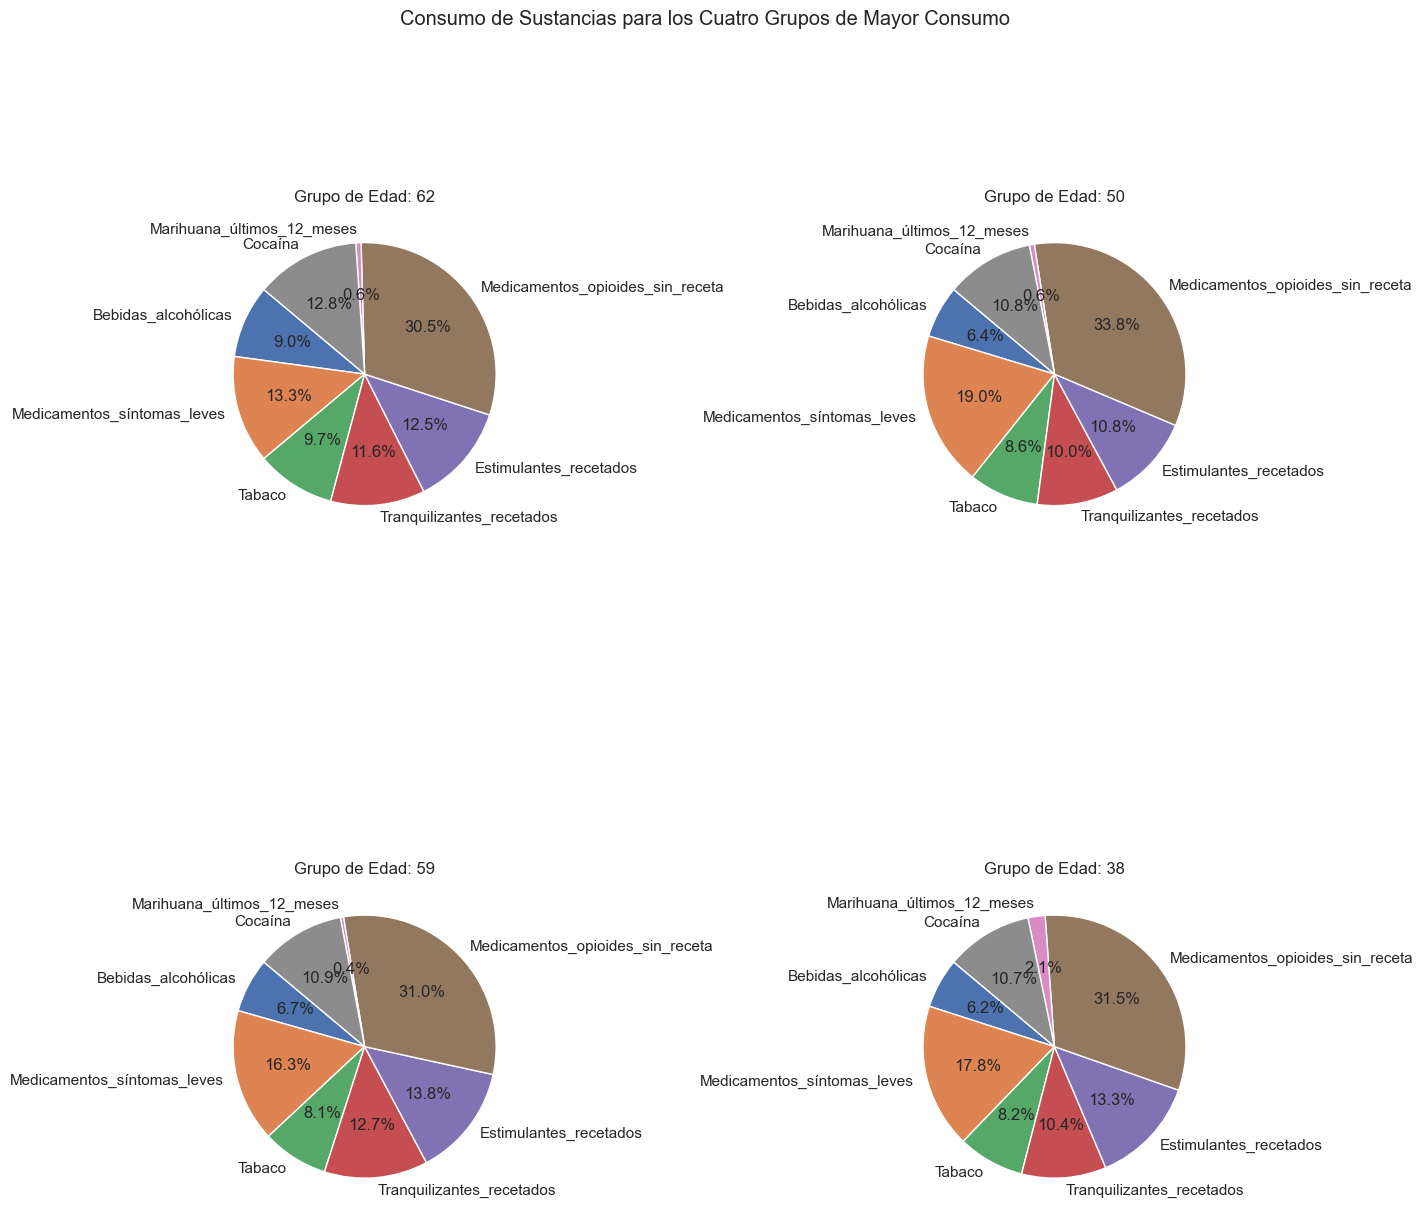

In [23]:
# Asumiendo que 'consumo_medio_por_edad' ya ha sido calculado correctamente
# Sumar el consumo total de todas las sustancias para cada grupo de edad
consumo_total_por_edad = consumo_medio_por_edad.sum(axis=1)

# Ordenar los grupos de edad por consumo total y seleccionar los cuatro mayores
cuatro_grupos_mayor_consumo = consumo_total_por_edad.sort_values(ascending=False).head(4)

# Crear un gráfico de torta para cada uno de los cuatro grupos de mayor consumo
fig, axs = plt.subplots(2, 2, figsize=(14, 14))  # 2x2 subplots
axs = axs.flatten()  # Convertir la matriz de ejes en un array plano para facilitar la iteración

for i, (grupo_edad, _) in enumerate(cuatro_grupos_mayor_consumo.items()):
    consumo_por_sustancia = consumo_medio_por_edad.loc[grupo_edad]
    axs[i].pie(consumo_por_sustancia, labels=consumo_por_sustancia.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Grupo de Edad: {grupo_edad}')

plt.suptitle('Consumo de Sustancias para los Cuatro Grupos de Mayor Consumo')
plt.tight_layout()
plt.show()



Conclusion consumo por edad :
Como se ve  los mayores consumidores son los mayores de 38 años , y consumen en su mayoria medicamentos sin receta mde sintomas leves o calmantes

C:\Users\danie\AppData\Local\Temp\ipykernel_21440\2302411123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado['Sexo'] = df_seleccionado['Sexo'].astype('category')


<Figure size 1400x700 with 0 Axes>

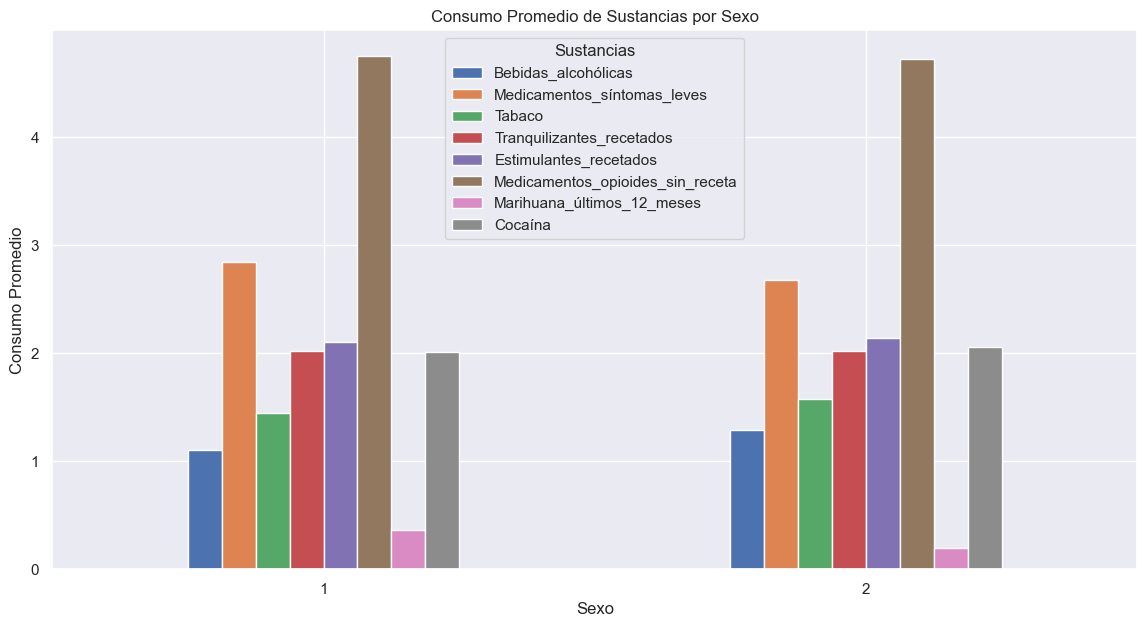

In [24]:
df_seleccionado['Sexo'] = df_seleccionado['Sexo'].astype('category')

# Seleccionar solo las columnas numéricas para calcular la media
columnas_numericas = df_seleccionado.select_dtypes(include=['number']).columns

# Calcular el consumo promedio por sexo, seleccionando solo las columnas numéricas
consumo_medio_por_sexo = df_seleccionado.groupby('Sexo')[columnas_numericas].mean()

# Gráfico de barras para el consumo medio por sexo
plt.figure(figsize=(14, 7))
consumo_medio_por_sexo.plot(kind='bar')
plt.title('Consumo Promedio de Sustancias por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Consumo Promedio')
plt.xticks(rotation=0)
plt.legend(title='Sustancias')
plt.show()

Conclusion consumo por sexo :
  no hay diferencias en el consumo x sexo ,la gran mayoria del consumo son medicamnetos con o sin receta , como calmantes ,analgesicos,ansioliticos.

CONCLUSIONES  GENERALES :

   La gente  en general cree, que el alcohol ,la marihuana o la cocahina es lo que mas se consume , y ese datos  es equivocado , los medicamentos que estan en cualquier fermacia ,son los mas consumidos.

In [25]:
df_seleccionado.describe()

,Bebidas_alcohólicas,Medicamentos_síntomas_leves,Tabaco,Tranquilizantes_recetados,Estimulantes_recetados,Medicamentos_opioides_sin_receta,Marihuana_últimos_12_meses,Cocaína
count,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000
mean,1.204029,2.754187,1.515918,2.020146,2.123528,4.737274,0.270270,2.037473
std,1.820729,4.072860,1.351328,4.065810,3.952772,8.417326,1.090352,2.656042
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,0.000000,2.000000
50%,1.000000,3.000000,1.000000,2.000000,2.000000,4.000000,0.000000,2.000000
75%,1.000000,3.000000,2.000000,2.000000,2.000000,4.000000,0.000000,2.000000
max,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


Hipotesys

Hipótesis Nula (H0): No existe diferencia significativa en las tasas de consumo de sustancias entre diferentes grupos demográficos (como edad, género, ubicación geográfica, nivel socioeconómico, etc.) en Argentina según los datos recopilados en 2022.

como se puede expresar H0 , como H0:    "H0:μ_edad=μ_general"

"no hay diferencia de consumo de sustancias entre una edad en particular y la del grupo de la poblacion total"


Hipótesis Alternativa (H1): Existen diferencias significativas en las tasas de consumo de sustancias entre diferentes grupos demográficos en Argentina, y estas diferencias se pueden asociar con variables como la edad, el género, la ubicación geográfica, el nivel socioeconómico, entre otros, según los datos recopilados en 2022.

Podemos platear 3 tipos de H1 :

1- H1_@ : μ_edad != μ_general (test bivariado)

2- H1_@ : μ_edad > μ_general (test univariado)

3- H1_@ : μ_edad < μ_general (test univariado)




Hipótesis Nula (H0): No existe diferencia significativa en las tasas de consumo de sustancias entre diferentes grupos demográficos (como edad, género, ubicación geográfica, nivel socioeconómico, etc.) en Argentina según los datos recopilados en 2022.

In [26]:
# el consumo del grupo de 50 años esta por arriba del cosnumo promedio de la poblacion
# utilizamos la columna de mayor consumo Medicamentos sin recetas

datos_comp= 4.737274  #valor a comparar 

df_medcam= df_seleccionado[df_seleccionado['Edad_encuestado']==50] # datos a buscar


#prueba t

t_stats,p_valor=stats.ttest_1samp(a=df_medcam['Medicamentos_opioides_sin_receta'],popmean=datos_comp)

media_hipotetica = 0.1 # Define aquí tu media poblacional hipotética

# H0:μ_edad=μ_general  si  p_valor/2 < media_hipotetica  rechazamos la hipotesis nula
# H1:μ_edad>μ_general  si  p_valor/2 > media_hipotetica  no rechazamos la hipotesis nula

# Imprimir los resultados
print("t estadístico:", t_stats)
print("Valor p:", p_valor/2)  # Dividimos el valor p por 2 porque es una prueba de cola superior

if p_valor/2 < media_hipotetica:
    print("Rechazamos la hipótesis nula,porque el valor p es menor que la media hipotética")
else:
    print("No rechazamos la hipótesis nula, porque el valor p es mayor que la media hipotética")




t estadístico: 1.4842634207064576
Valor p: 0.06961923016607457
Rechazamos la hipótesis nula,porque el valor p es menor que la media hipotética


Comparar la hipotesys entre 2 grupos poblacionales -cola inferior

In [27]:
# comprobar que el consumo del grupo de 50 años es diferente al de 38 años
df_medcam_50= df_seleccionado[df_seleccionado['Edad_encuestado']==50] # datos a buscar
df_medcam_38= df_seleccionado[df_seleccionado['Edad_encuestado']==38] # datos a buscar

#prueba t
t_estadistico_comparacion,p_valor_comparacion=stats.ttest_ind(a=df_medcam_50['Medicamentos_opioides_sin_receta'],b=df_medcam_38['Medicamentos_opioides_sin_receta'],equal_var=False)


# Imprimir los resultados
print("t estadístico:", t_estadistico_comparacion)
print("Valor p:", p_valor_comparacion/2)  # Dividimos el valor p por 2 porque es una prueba de cola superior

if p_valor_comparacion/2 < media_hipotetica:
    print("Rechazamos la hipótesis nula,porque el valor p es menor que la media hipotética")
else:
    print("No rechazamos la hipótesis nula, porque el valor p es mayor que la media hipotética")



t estadístico: 0.3885099561116335
Valor p: 0.34891847835646816
No rechazamos la hipótesis nula, porque el valor p es mayor que la media hipotética


comparar hipotesys  con cola superior 

In [28]:
# comprobar que el consumo del grupo de 50 años es diferente al de 62 años
df_medcam_50= df_seleccionado[df_seleccionado['Edad_encuestado']==50] # datos a buscar
df_medcam_62= df_seleccionado[df_seleccionado['Edad_encuestado']==62] # datos a buscar

#prueba t
t_estadistico_comparacion,p_valor_comparacion=stats.ttest_ind(a=df_medcam_50['Medicamentos_opioides_sin_receta'],b=df_medcam_62['Medicamentos_opioides_sin_receta'],equal_var=False)


# Imprimir los resultados
print("t estadístico:", t_estadistico_comparacion)
print("Valor p:", p_valor_comparacion/2)  # Dividimos el valor p por 2 porque es una prueba de cola superior

if p_valor_comparacion/2 < media_hipotetica:
    print("Rechazamos la hipótesis nula,porque el valor p es menor que la media hipotética")
else:
    print("No rechazamos la hipótesis nula, porque el valor p es mayor que la media hipotética")



t estadístico: 0.2518112520597713
Valor p: 0.40065664586641553
No rechazamos la hipótesis nula, porque el valor p es mayor que la media hipotética
